## Cryptocurrency Market Prediction: Understanding the Impact of Social Sentiment on Cryptocurrency Price Volatility

#### Name: Ky Cuong Pham
#### Student ID: a1906313
#### Course: Big Data Analysis and Project

## 1. EDA

In [25]:
import pandas as pd

df_bitcoin_tweet = pd.read_csv('bitcoin_tweets_clean_sentiment.csv')
df_bitcoin_tweet['created_at'] = pd.to_datetime(df_bitcoin_tweet['created_at'])
df_bitcoin_tweet = df_bitcoin_tweet.sort_values(by='created_at')
df_bitcoin_tweet

,text,created_at,clean_text,intensity_score,positive_score,negative_score,neutral_score,textblob_polarity,sentiment_polarity,text_length
11995,RT @OrignalVentures: #Buzz #Approved #BTC Help...,2022-02-28 04:31:33+00:00,rt buzz approved btc help get phys btc etf app...,0.9153,0.448,0.000,0.552,0.000000,positive,22
11996,@BTC_Archive Hiding gems here guys..\nCheck ou...,2022-02-28 04:31:33+00:00,hiding gems here guys check out will be launch...,0.1280,0.129,0.105,0.766,0.000000,positive,18
11992,RT @EliEli003: @BluesparrowC @BitcoinMagazine ...,2022-02-28 04:31:33+00:00,rt eth bluesparrow bluesparrow bluesparrow bluesp,0.0000,0.000,0.000,1.000,0.000000,neutral,6
11994,RT @airdropinspect: New airdrop: Woonkly (USDT...,2022-02-28 04:31:33+00:00,rt new airdrop woonkly usdt total reward usdt ...,0.8357,0.426,0.000,0.574,0.034091,positive,15
11997,RT @SpinelloLuca: 🔥🔥GIVEAWAY🔥🔥\n\n1 Prize 100 ...,2022-02-28 04:31:33+00:00,rt giveaway prize in btc prize in eth prize eg...,0.9451,0.574,0.000,0.426,0.800000,positive,17
...,...,...,...,...,...,...,...,...,...,...
1391710,RT @emilioopaz: Let’s recover together. I want...,2022-06-24 05:02:09+00:00,rt lets recover together i want to make some g...,0.4019,0.171,0.000,0.829,0.000000,positive,20
1391703,RT @bsctimes: #Bitcoin is above $21K once agai...,2022-06-24 05:02:10+00:00,rt bitcoin is above k once again will it hold ...,0.0000,0.000,0.000,1.000,0.000000,neutral,26
1391702,RT @BlueZillaVc: 💸Are you ready for the new tr...,2022-06-24 05:02:10+00:00,rt are you ready for the new trend earnz movez...,0.8689,0.351,0.000,0.649,0.367273,positive,24
1391704,@LivePriceCrypto BOBOINU X PITBULL ✨\nThe most...,2022-06-24 05:02:10+00:00,boboinu x pitbull the most powerful meme bear ...,0.9273,0.335,0.000,0.665,0.525000,positive,34


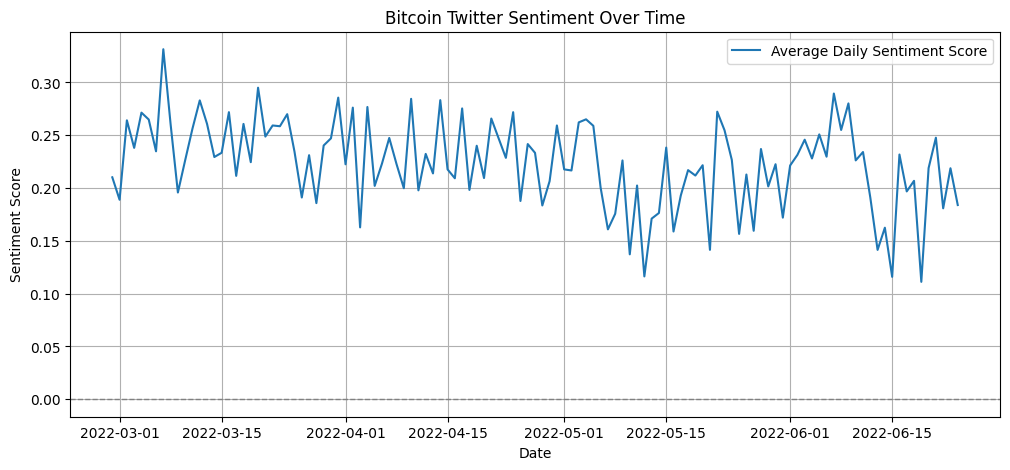

In [26]:
import matplotlib.pyplot as plt

# Resample to daily sentiment average
daily_sentiment = df_bitcoin_tweet.set_index('created_at').resample('D')['intensity_score'].mean()

plt.figure(figsize=(12, 5))
plt.plot(daily_sentiment, label='Average Daily Sentiment Score')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Bitcoin Twitter Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

#Explaination:



The grap shows how bitcoin sentiment has changed over time, with the x-axis representing the date and the y-axis showing the average daily sentiment score. The horizontal line at 0 indicates a neutral sentiment, with scores above it indicating positive sentiment and scores below it indicating negative sentiment. The graph helps visualize trends in public sentiment towards bitcoin on Twitter, which can be useful for understanding market psychology and potential price movements.

<Figure size 1400x600 with 0 Axes>

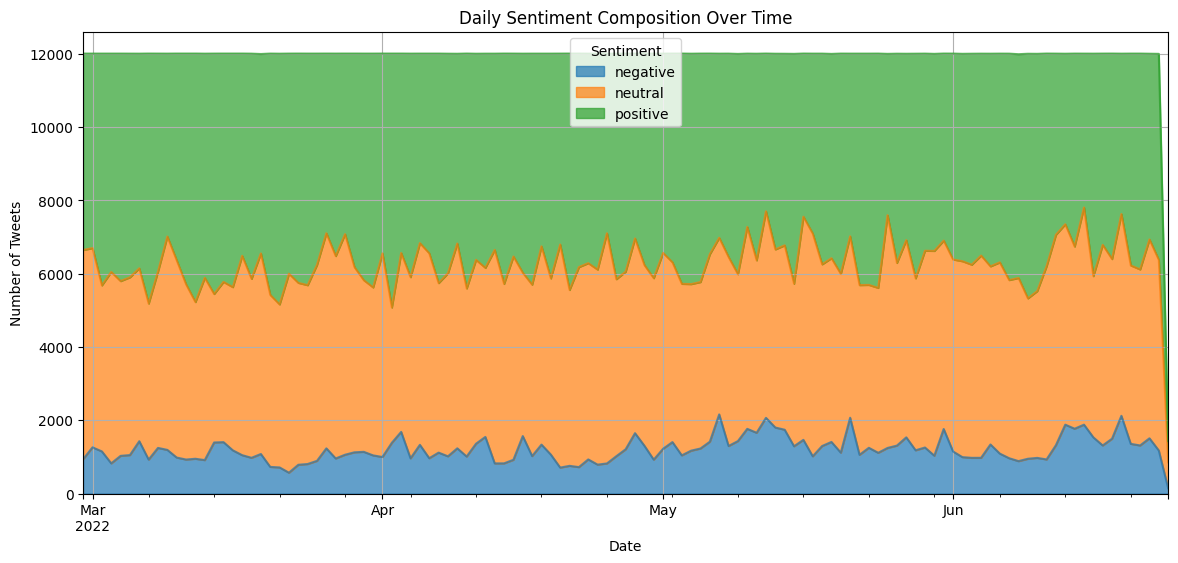

In [27]:
# Create daily sentiment counts
sentiment_daily = df_bitcoin_tweet.groupby([pd.Grouper(key='created_at', freq='D'), 'sentiment_polarity']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
sentiment_daily.plot.area(stacked=True, figsize=(14, 6), alpha=0.7)
plt.title('Daily Sentiment Composition Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

In [29]:
df_bnb

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2022-02-28 00:00:00,360.1,360.1,359.6,359.7,376.700,2022-02-28 00:00:59.999,135582.2487,212.0,70.032,25200.3825,0.0
2022-02-28 00:01:00,359.6,359.8,359.4,359.8,234.567,2022-02-28 00:01:59.999,84338.2949,204.0,138.557,49822.5552,0.0
2022-02-28 00:02:00,359.7,360.1,358.8,358.9,984.054,2022-02-28 00:02:59.999,353611.5419,472.0,589.629,211855.5250,0.0
2022-02-28 00:03:00,358.9,358.9,358.2,358.3,1462.890,2022-02-28 00:03:59.999,524589.4664,582.0,714.774,256362.5613,0.0
2022-02-28 00:04:00,358.3,359.2,358.2,358.9,502.149,2022-02-28 00:04:59.999,180153.1314,212.0,368.482,132200.0007,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24 23:55:00,240.3,240.7,240.1,240.7,1122.810,2022-06-24 23:55:59.999,269862.9710,391.0,718.558,172717.9930,0.0
2022-06-24 23:56:00,240.6,240.7,240.2,240.3,551.966,2022-06-24 23:56:59.999,132670.1984,169.0,258.145,62039.8275,0.0
2022-06-24 23:57:00,240.3,240.3,239.9,240.2,778.233,2022-06-24 23:57:59.999,186837.5646,326.0,216.369,51964.4010,0.0


In [28]:
import pandas as pd

# Load BNB CSV
df_bnb = pd.read_csv('bnb_price_filtered.csv')

# Convert Open time to datetime (already in string format)
df_bnb['Open time'] = pd.to_datetime(df_bnb['Open time'])

# Set index for resampling
df_bnb.set_index('Open time', inplace=True)

# Get daily average close price
bnb_close = df_bnb['Close'].resample('D').mean()

bnb_close


Open time
2022-02-28    372.362639
2022-03-01    404.005278
2022-03-02    410.018819
2022-03-03    405.539236
2022-03-04    390.260556
                 ...    
2022-06-20    212.361458
2022-06-21    221.433750
2022-06-22    215.981597
2022-06-23    223.689931
2022-06-24    235.219236
Freq: D, Name: Close, Length: 117, dtype: float64

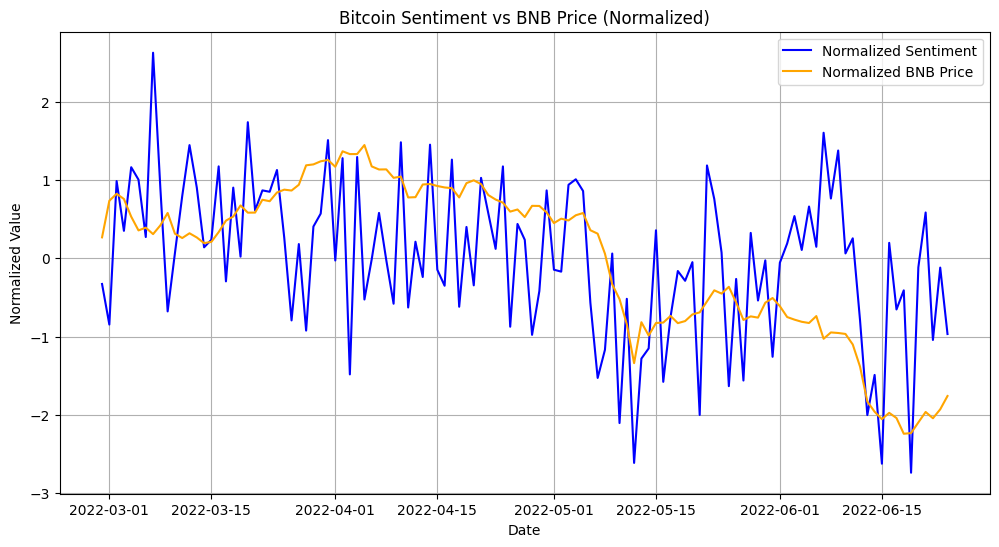

In [31]:
# Align bnb_close index to UTC to match daily_sentiment
bnb_close_utc = bnb_close.copy()
bnb_close_utc.index = bnb_close_utc.index.tz_localize('UTC')

# Combine with sentiment
combined_bnb = pd.concat([daily_sentiment, bnb_close_utc], axis=1).dropna()
combined_bnb.columns = ['Sentiment', 'BNB_Close']

# Normalize
combined_bnb['Sentiment_norm'] = (combined_bnb['Sentiment'] - combined_bnb['Sentiment'].mean()) / combined_bnb['Sentiment'].std()
combined_bnb['BNB_norm'] = (combined_bnb['BNB_Close'] - combined_bnb['BNB_Close'].mean()) / combined_bnb['BNB_Close'].std()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(combined_bnb.index, combined_bnb['Sentiment_norm'], label='Normalized Sentiment', color='blue')
plt.plot(combined_bnb.index, combined_bnb['BNB_norm'], label='Normalized BNB Price', color='orange')
plt.title('Bitcoin Sentiment vs BNB Price (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.show()


The above graph shows the normalized BNB Price and Sentiment Score over time. The x-axis represents the date, while the y-axis shows the normalized values for both BNB Price and Sentiment Score. The blue line represents the normalized BNB Price, and the orange line represents the normalized Sentiment Score. As can be seen, at some points, the sentiment score tends to rise before the BNB price, and vice versa, indicating a potential relationship between public sentiment and BNB price movements. The normalization allows for a direct comparison of the two variables on the same scale, making it easier to identify trends and correlations.

In [5]:
combined_bnb

,Sentiment,BNB_Close,Sentiment_norm,BNB_norm
2022-02-28 00:00:00+00:00,0.225330,372.362639,-0.499437,0.266707
2022-03-01 00:00:00+00:00,0.212620,404.005278,-0.807950,0.734135
2022-03-02 00:00:00+00:00,0.263279,410.018819,0.421734,0.822967
2022-03-03 00:00:00+00:00,0.254751,405.539236,0.214725,0.756794
2022-03-04 00:00:00+00:00,0.267043,390.260556,0.513110,0.531096
...,...,...,...,...
2022-06-20 00:00:00+00:00,0.259261,212.361458,0.324211,-2.096845
2022-06-21 00:00:00+00:00,0.276380,221.433750,0.739739,-1.962828
2022-06-22 00:00:00+00:00,0.247817,215.981597,0.046408,-2.043368
2022-06-23 00:00:00+00:00,0.272301,223.689931,0.640732,-1.929499


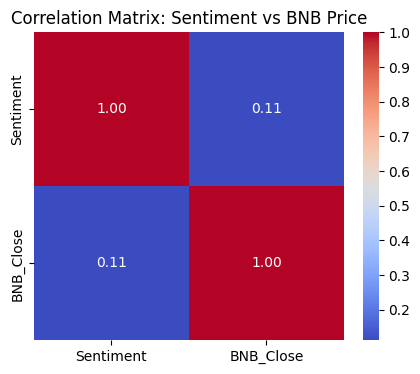

In [49]:
import seaborn as sns

corr_matrix_bnb = combined_bnb[['Sentiment', 'BNB_Close']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_bnb, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Sentiment vs BNB Price")
plt.show()


Eventhought sentiment and price are correlated, the relationship is not very strong. Just 0.11 correlation coefficient, which means that while there is some relationship between the two, it is not very strong. This suggests that other factors may also be influencing BNB price movements, and sentiment alone may not be a reliable predictor of price changes.

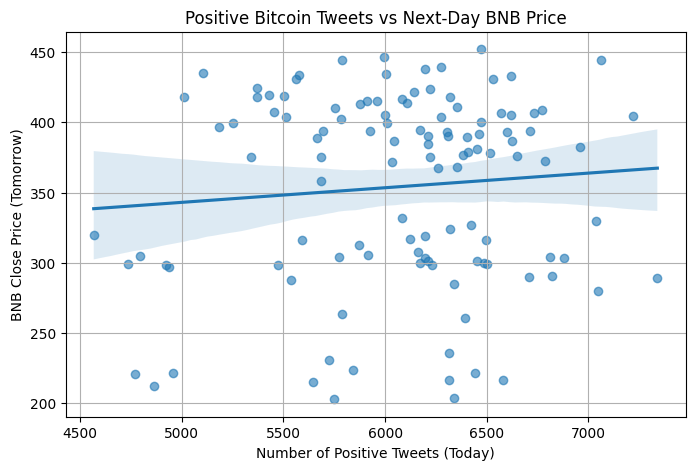

In [6]:
# Filter positive tweets
df_positive = df_bitcoin_tweet[df_bitcoin_tweet['sentiment_polarity'] == 'positive']

# Count per day
positive_counts = df_positive.set_index('created_at').resample('D').size()
positive_counts.name = 'positive_tweet_count'

# Already resampled BNB daily price
bnb_close = df_bnb['Close'].resample('D').mean()
bnb_next_day = bnb_close.shift(-1)
bnb_next_day.name = 'bnb_next_day_price'
# Join on daily index
bnb_next_day_utc = bnb_next_day.copy()
bnb_next_day_utc.index = bnb_next_day_utc.index.tz_localize('UTC')

df_hypothesis = pd.concat([positive_counts, bnb_next_day_utc], axis=1).dropna()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(data=df_hypothesis, x='positive_tweet_count', y='bnb_next_day_price', scatter_kws={'alpha':0.6})
plt.title('Positive Bitcoin Tweets vs Next-Day BNB Price')
plt.xlabel('Number of Positive Tweets (Today)')
plt.ylabel('BNB Close Price (Tomorrow)')
plt.grid(True)
plt.show()


As can be seen, because of the slightly postive slope, the price tends to increase more often after days with lots of positive tweets, but those increases are usually small and frequent, rather than big jumps. When there aren’t many positive tweets, prices tend to be less likely to rise and more likely to stay flat or drop.

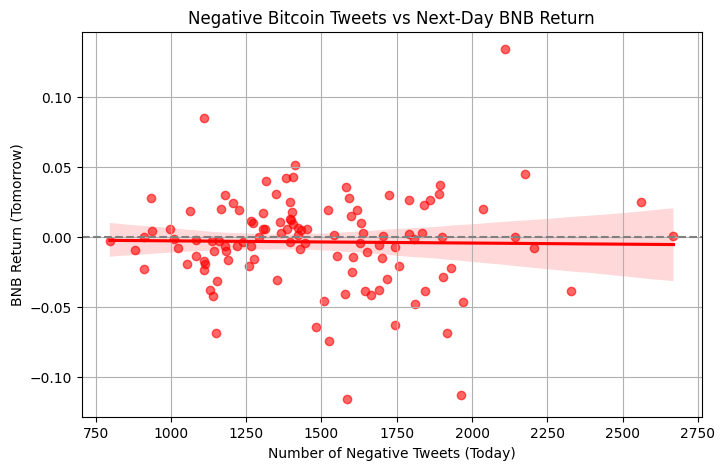

In [58]:
# Filter negative tweets
df_negative = df_bitcoin_tweet[df_bitcoin_tweet['sentiment_polarity'] == 'negative']

# Count per day
negative_counts = df_negative.set_index('created_at').resample('D').size()
negative_counts.name = 'negative_tweet_count'
# Daily close price
bnb_close = df_bnb['Close'].resample('D').mean()

# Next-day return
bnb_return_next_day = bnb_close.pct_change().shift(-1)  # next day return
bnb_return_next_day.name = 'bnb_next_day_return'
# Combine
bnb_return_next_day_utc = bnb_return_next_day.copy()
bnb_return_next_day_utc.index = bnb_return_next_day_utc.index.tz_localize('UTC')

df_negative_test = pd.concat([negative_counts, bnb_return_next_day_utc], axis=1).dropna()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(data=df_negative_test, x='negative_tweet_count', y='bnb_next_day_return', scatter_kws={'alpha':0.6}, color='red')
plt.title('Negative Bitcoin Tweets vs Next-Day BNB Return')
plt.xlabel('Number of Negative Tweets (Today)')
plt.ylabel('BNB Return (Tomorrow)')


plt.axhline(0, linestyle='--', color='gray')
plt.grid(True)
plt.show()




The plot for negative suggests that we might not want to use negative sentiment as a predictor for price movements, as it does not show a clear relationship with the price. The negative slope indicates that on days with more negative tweets, the price tends to decrease, but this is not a strong or consistent pattern. The fluctuations in the price do not align well with the negative sentiment, suggesting that negative sentiment may not be a reliable indicator of price movements in this case.

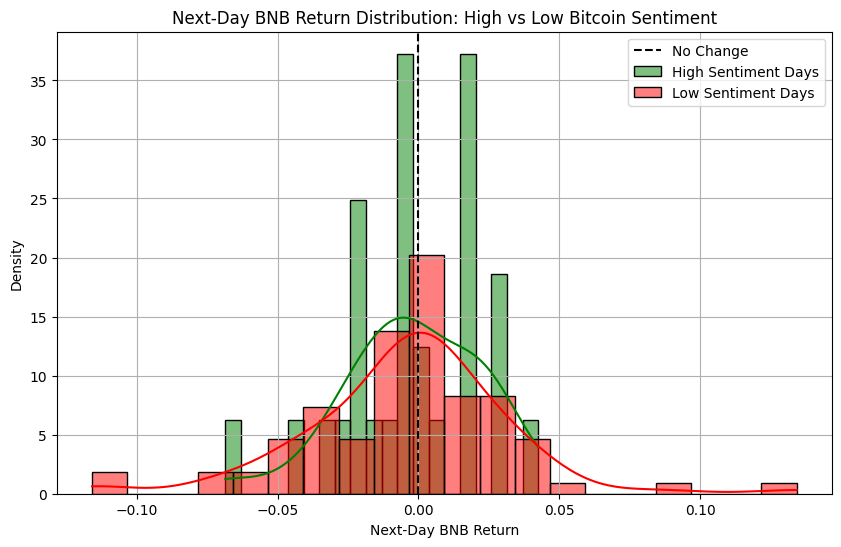

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Daily total sentiment score
daily_sentiment_sum = df_bitcoin_tweet.set_index('created_at').resample('D')['intensity_score'].sum()
daily_sentiment_sum.name = 'daily_sentiment_sum'

# STEP 2: Get BNB price and calculate next-day return
bnb_close = df_bnb['Close'].resample('D').mean()
bnb_return_next_day = bnb_close.pct_change().shift(-1)
bnb_return_next_day.name = 'bnb_next_day_return'

# Make sure both indices are tz-aware (UTC)
if bnb_return_next_day.index.tz is None:
	bnb_return_next_day.index = bnb_return_next_day.index.tz_localize('UTC')

# STEP 3: Merge into one DataFrame
df = pd.concat([daily_sentiment_sum, bnb_return_next_day], axis=1).dropna()

# STEP 4: Define sentiment threshold
threshold = df['daily_sentiment_sum'].quantile(0.75)  # Top 25% sentiment days

# STEP 5: Split by high vs low sentiment days
high_sentiment = df[df['daily_sentiment_sum'] > threshold]
low_sentiment = df[df['daily_sentiment_sum'] <= threshold]

# STEP 6: Plot histograms
plt.figure(figsize=(10, 6))
sns.histplot(high_sentiment['bnb_next_day_return'], color='green', label='High Sentiment Days', kde=True, stat='density', bins=20)
sns.histplot(low_sentiment['bnb_next_day_return'], color='red', label='Low Sentiment Days', kde=True, stat='density', bins=20)
plt.title('Next-Day BNB Return Distribution: High vs Low Bitcoin Sentiment')
plt.xlabel('Next-Day BNB Return')
plt.ylabel('Density')
plt.axvline(0, color='black', linestyle='--', label='No Change')
plt.legend()
plt.grid(True)
plt.show()

#The price tends to increase more often after days with lots of positive tweets, but those increases are usually small and frequent, rather than big jumps.

# When there aren’t many positive tweets, prices tend to be less likely to rise and more likely to stay flat or drop.

As can be seen, more positve tweets tend to lead to a slight increase in price the next day, while negative tweets tend to lead to a slight decrease in price the next day. However, the relationship is not very strong, and there are many other factors that can influence price movements in the cryptocurrency market.

# Data processing 

In [3]:
# Step 1: Get total number of rows (excluding header)
with open('Bitcoin_tweets.csv') as f:
    total_rows = sum(1 for _ in f) - 1  # subtract header

# Step 2: Calculate where to start
start_row = total_rows // 2 + 1  # +1 to skip header

In [4]:
start_row

11201703

In [1]:
import pandas as pd 

df = pd.read_csv('Bitcoin_tweets.csv')
df['date'] = pd.to_datetime(df['date'], utc=True)
df = df.sort_values(by='date')
df

,Unnamed: 0,date,text
8373,2347469,2022-03-02 16:38:11+00:00,#Orijin #Polygon #IDO #BSC #Eth #BTC #Airdrop ...
8372,2347468,2022-03-02 16:38:14+00:00,#11MINUTES #BTC #CRYPTO\n\nThis is very intere...
8371,2347467,2022-03-02 16:38:21+00:00,Current #Bitcoin Price is $44370 #BTC #Crypto
8370,2347466,2022-03-02 16:38:21+00:00,#Russia (#Putin) invaliding #Ukraine is unfort...
8369,2347465,2022-03-02 16:38:23+00:00,👑Psycho Ape is an exclusive collection of uniq...
...,...,...,...
1341313,3737054,2022-06-24 23:59:40+00:00,"@TheMoonCarl It's not a scam, it's very import..."
1341312,3737053,2022-06-24 23:59:44+00:00,"@TheMoonCarl It's not a scam, it's very import..."
1341311,3737052,2022-06-24 23:59:46+00:00,"🚀 🚀 🚀 $1,129,128 BTCUSDT LONGED @$21,235.00 on..."
1341309,3737050,2022-06-24 23:59:48+00:00,"@TheMoonCarl It's not a scam, it's very import..."


In [2]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')  # Remove index column if exists
df.reset_index(drop=True, inplace=True)  # Reset index after sorting

In [3]:
df

,date,text
0,2022-03-02 16:38:11+00:00,#Orijin #Polygon #IDO #BSC #Eth #BTC #Airdrop ...
1,2022-03-02 16:38:14+00:00,#11MINUTES #BTC #CRYPTO\n\nThis is very intere...
2,2022-03-02 16:38:21+00:00,Current #Bitcoin Price is $44370 #BTC #Crypto
3,2022-03-02 16:38:21+00:00,#Russia (#Putin) invaliding #Ukraine is unfort...
4,2022-03-02 16:38:23+00:00,👑Psycho Ape is an exclusive collection of uniq...
...,...,...
1374608,2022-06-24 23:59:40+00:00,"@TheMoonCarl It's not a scam, it's very import..."
1374609,2022-06-24 23:59:44+00:00,"@TheMoonCarl It's not a scam, it's very import..."
1374610,2022-06-24 23:59:46+00:00,"🚀 🚀 🚀 $1,129,128 BTCUSDT LONGED @$21,235.00 on..."
1374611,2022-06-24 23:59:48+00:00,"@TheMoonCarl It's not a scam, it's very import..."


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Extract sentiment features
def extract_sentiment_features(text):
    """Extract comprehensive sentiment features from text"""
    if pd.isna(text):
        return pd.Series([0, 0, 0, 0, 0, 'neutral', 0])
    
    # VADER sentiment analysis
    vader_scores = analyzer.polarity_scores(text)
    
    # TextBlob sentiment analysis
    blob = TextBlob(text)
    textblob_polarity = blob.sentiment.polarity
    textblob_subjectivity = blob.sentiment.subjectivity
    
    # Classify sentiment polarity
    if vader_scores['compound'] >= 0.05:
        sentiment_label = 'positive'
    elif vader_scores['compound'] <= -0.05:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'
    
    # Text length (proxy for language patterns)
    text_length = len(text.split())
    
    return pd.Series([
        vader_scores['compound'],     # Intensity score
        vader_scores['pos'],          # Positive score
        vader_scores['neg'],          # Negative score
        vader_scores['neu'],          # Neutral score
        textblob_polarity,           # TextBlob polarity
        sentiment_label,             # Sentiment polarity classification
        text_length                  # Language pattern indicator
    ])


In [4]:
import re
from tqdm import tqdm

def clean_tweet_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (keep the word or remove whole hashtag)
    text = re.sub(r'#', '', text)  # just remove '#' symbol
    # text = re.sub(r'#\w+', '', text)  # or remove whole hashtag
    
    # Remove emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # Remove punctuation and numbers (optional)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Clean the text column with tqdm progress bar
tqdm.pandas()
df['clean_text'] = df['text'].progress_apply(clean_tweet_text)
df


  0%|          | 0/1374613 [00:00<?, ?it/s]

100%|██████████| 1374613/1374613 [00:30<00:00, 44857.61it/s]


,date,text,clean_text
0,2022-03-02 16:38:11+00:00,#Orijin #Polygon #IDO #BSC #Eth #BTC #Airdrop ...,orijin polygon ido bsc eth btc airdrop defi la...
1,2022-03-02 16:38:14+00:00,#11MINUTES #BTC #CRYPTO\n\nThis is very intere...,minutes btc crypto this is very interesting pr...
2,2022-03-02 16:38:21+00:00,Current #Bitcoin Price is $44370 #BTC #Crypto,current bitcoin price is btc crypto
3,2022-03-02 16:38:21+00:00,#Russia (#Putin) invaliding #Ukraine is unfort...,russia putin invaliding ukraine is unfortunate...
4,2022-03-02 16:38:23+00:00,👑Psycho Ape is an exclusive collection of uniq...,psycho ape is an exclusive collection of uniqu...
...,...,...,...
1374608,2022-06-24 23:59:40+00:00,"@TheMoonCarl It's not a scam, it's very import...",its not a scam its very importantbinance bnb c...
1374609,2022-06-24 23:59:44+00:00,"@TheMoonCarl It's not a scam, it's very import...",its not a scam its very importantbinance bnb c...
1374610,2022-06-24 23:59:46+00:00,"🚀 🚀 🚀 $1,129,128 BTCUSDT LONGED @$21,235.00 on...",btcusdt longed on binance utc btc cryptocurrency
1374611,2022-06-24 23:59:48+00:00,"@TheMoonCarl It's not a scam, it's very import...",its not a scam its very importantbinance bnb c...


In [7]:
sentiment_features = df['clean_text'].progress_apply(extract_sentiment_features)
sentiment_features.columns = ['intensity_score', 'positive_score', 'negative_score', 
                             'neutral_score', 'textblob_polarity', 'sentiment_polarity', 
                             'text_length']

# Combine with original dataframe
df_sentiment = pd.concat([df, sentiment_features], axis=1)
df_sentiment.to_csv('bitcoin_tweets_clean_sentiment.csv', index=False)

100%|██████████| 1374613/1374613 [11:19<00:00, 2023.48it/s]


In [9]:
df_sentiment.drop(columns=['text'], inplace=True, errors='ignore')  # Remove index column if exists
df_sentiment.to_csv('bitcoin_tweets_clean_sentiment.csv', index=False)